In [5]:
import sys
sys.path.append("/home/diego/python/convolution-kernels/")
sys.path.append("/home/diego/python/stochastic-processes/")
sys.path.append("/home/diego/python/utils/")

import matplotlib.pyplot as plt
import numpy as np

from kernel.fun import KernelFun
from processes.renewal_process import RenewalProcess
from signals import raw_autocorrelation

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


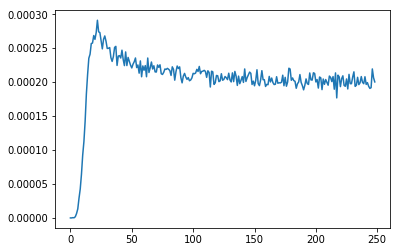

In [15]:
def double_exp(t, A, tr, td, t0):
    return A * tr * td / (td - tr) * (np.exp(-(t - t0) / td) - np.exp(-(t - t0) / tr))

n_trials = 5000
t = np.arange(0, 1000, 1)

b, A, tr, td, t0 = -4.5, 0.2, 5, 50, 12

eta = KernelFun(double_exp, basis_kwargs=dict(A=np.array([A])), shared_kwargs=dict(tr=tr, td=td, t0=t0), 
            coefs=np.array([1]), support=[0, tr * td / (td - tr) + td * 7])    
rp = RenewalProcess(b, eta)

u, r, mask_spikes = rp.sample(t, shape=(n_trials,))
n_spikes = np.sum(mask_spikes, 0)
autocor = raw_autocorrelation(mask_spikes, biased=False)

fig, ax1 = plt.subplots()
ax1.plot(np.mean(autocor[1:250], 1))